In [1]:
from models import UnetAdaptiveBins
import model_io
from PIL import Image
import matplotlib.pyplot as plt
from infer import InferenceHelper
MIN_DEPTH = 1e-3
MAX_DEPTH_NYU = 10
MAX_DEPTH_KITTI = 80

N_BINS = 256 


Loading base model ()...

Using cache found in /home/m11002125/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


Done.
Removing last two layers (global_pool & classifier).
Building Encoder-Decoder model..Done.
here <class 'PIL.JpegImagePlugin.JpegImageFile'> (640, 480)


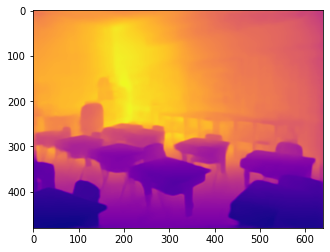

In [11]:
"""
predictions using nyu dataset
"""

infer_helper = InferenceHelper(dataset='nyu')

# predict depth of a single pillow image
img = Image.open("test_imgs/classroom__rgb_00283.jpg")  # any rgb pillow image
print('here',type(img), img.size)
bin_centers, predicted_depth = infer_helper.predict_pil(img)

plt.imshow(predicted_depth[0][0], cmap='plasma')
plt.show()

Loading base model ()...

Using cache found in /home/m11002125/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


Done.
Removing last two layers (global_pool & classifier).
Building Encoder-Decoder model..Done.
here <class 'PIL.Image.Image'> (640, 480)


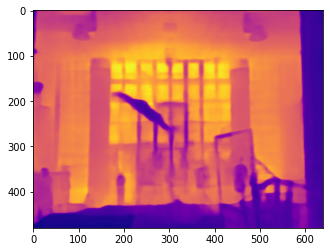

In [14]:
"""
predictions using nyu dataset
"""

infer_helper = InferenceHelper(dataset='nyu')

# predict depth of a single pillow image
img = Image.open("test_imgs/pic0.jpg").convert('RGB')  # any rgb pillow image
newsize = (640, 480)
img = img.resize(newsize)
print('here',type(img),img.size)
bin_centers, predicted_depth = infer_helper.predict_pil(img)

plt.imshow(predicted_depth[0][0], cmap='plasma')
plt.show()

In [2]:
# NYU
model = UnetAdaptiveBins.build(n_bins=N_BINS, min_val=MIN_DEPTH, max_val=MAX_DEPTH_NYU)
pretrained_path = "./pretrained/AdaBins_nyu.pt"
model, _, _ = model_io.load_checkpoint(pretrained_path, model)

bin_edges, predicted_depth = model(example_rgb_batch)

Loading base model ()...

Downloading: "https://github.com/rwightman/gen-efficientnet-pytorch/archive/master.zip" to /home/m11002125/.cache/torch/hub/master.zip
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_efficientnet_b5_ap-9e82fae8.pth" to /home/m11002125/.cache/torch/hub/checkpoints/tf_efficientnet_b5_ap-9e82fae8.pth


Done.
Removing last two layers (global_pool & classifier).
Building Encoder-Decoder model..Done.


NameError: name 'example_rgb_batch' is not defined

In [3]:
# KITTI
model = UnetAdaptiveBins.build(n_bins=N_BINS, min_val=MIN_DEPTH, max_val=MAX_DEPTH_KITTI)
pretrained_path = "./pretrained/AdaBins_kitti.pt"
model, _, _ = model_io.load_checkpoint(pretrained_path, model)

bin_edges, predicted_depth = model(example_rgb_batch)

Loading base model ()...

Using cache found in /home/m11002125/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


Done.
Removing last two layers (global_pool & classifier).
Building Encoder-Decoder model..Done.


NameError: name 'example_rgb_batch' is not defined